In [4]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 42s 0us/step


In [5]:
X_test.shape


(10000, 32, 32, 3)

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
y_train.shape


(50000, 1)

In [8]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [58]:
y_test = y_test.reshape(-1,)

In [27]:
classes= ['airplane','automobile','bird','cat','deer', 'dog' ,'frog','horse','ship','truck']

In [30]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

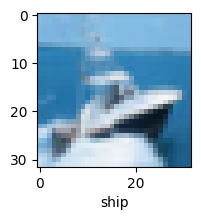

In [34]:
plot_sample(X_train,y_train,8)

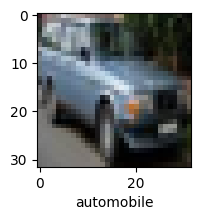

In [35]:
plot_sample(X_train,y_train,201)

In [36]:
X_train = X_train/255.0
X_test = X_test/255.0

In [38]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax'),
])

ann.compile(optimizer = 'SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train,y_train,epochs=5)
    
    

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 52ms/step - accuracy: 0.3075 - loss: 1.9286
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 100s 64ms/step - accuracy: 0.4187 - loss: 1.6461
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 92s 59ms/step - accuracy: 0.4564 - loss: 1.5439
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 49ms/step - accuracy: 0.4745 - loss: 1.4902
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 91s 55ms/step - accuracy: 0.4929 - loss: 1.4398


In [41]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('classification report: \n' , classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.48      0.57      0.52      1000
           1       0.52      0.70      0.60      1000
           2       0.38      0.41      0.40      1000
           3       0.35      0.26      0.30      1000
           4       0.46      0.38      0.41      1000
           5       0.44      0.33      0.37      1000
           6       0.53      0.57      0.55      1000
           7       0.67      0.42      0.51      1000
           8       0.52      0.70      0.60      1000
           9       0.52      0.55      0.53      1000

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.48     10000
weighted avg       0.49      0.49      0.48     10000



In [43]:
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

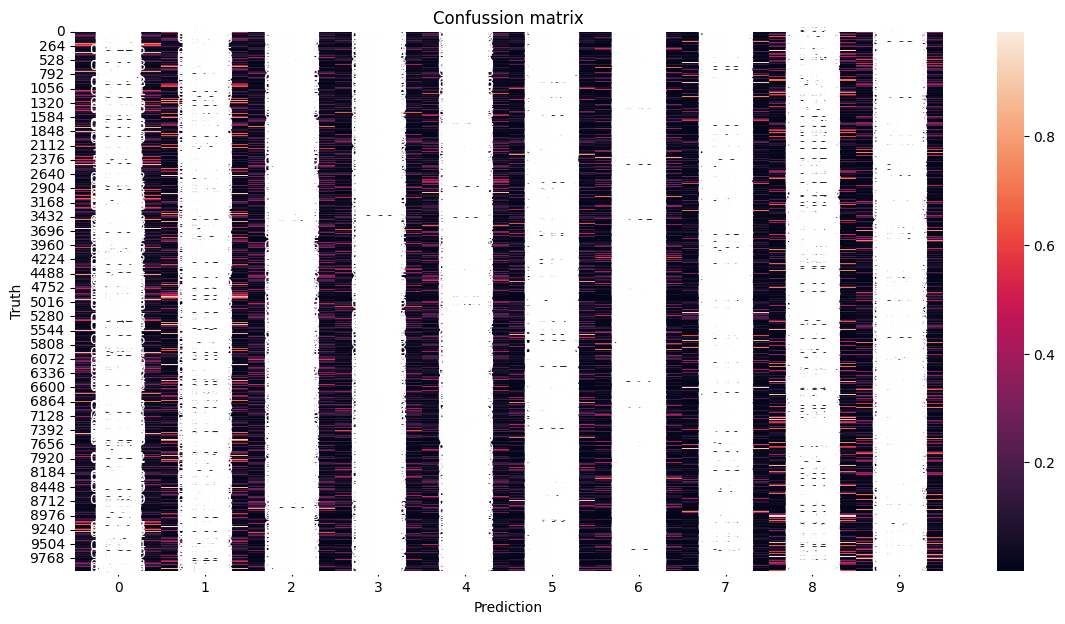

In [44]:
plt.figure(figsize = (14,7))
sns.heatmap(y_pred,annot = True)
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.title('Confussion matrix')
plt.show

In [50]:

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax'),
])




In [51]:
cnn.compile(optimizer='adam', 
            loss='sparse_categorical_crossentropy', 
            metrics=['accuracy'])


In [52]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.3426 - loss: 1.7803
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.5733 - loss: 1.2081
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.6265 - loss: 1.0633
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6585 - loss: 0.9849
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6818 - loss: 0.9104
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.7007 - loss: 0.8617
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.7133 - loss: 0.8221
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7266 - loss: 0.7833
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7443 - loss: 0.7299
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7510 - loss: 0.7150


In [54]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6803 - loss: 0.9530


[0.9675707817077637, 0.6769000291824341]

In [55]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


array([[2.2053769e-02, 1.0759013e-03, 6.3119573e-03, 8.3268273e-01,
        9.7817751e-03, 5.4950483e-02, 4.6541229e-02, 1.3920735e-04,
        2.6336832e-02, 1.2615566e-04],
       [1.5873706e-02, 2.1138029e-01, 1.1915069e-05, 1.3429396e-05,
        1.9962733e-06, 8.1417721e-07, 9.8160712e-08, 1.8487360e-07,
        7.7094322e-01, 1.7742584e-03],
       [7.4740581e-02, 2.5852227e-01, 3.7879085e-03, 5.3930632e-03,
        7.3212280e-04, 6.0526480e-04, 3.0599319e-04, 3.6267930e-04,
        6.2019378e-01, 3.5356268e-02],
       [6.4887828e-01, 9.7532652e-02, 2.7572878e-03, 4.9750955e-04,
        1.1642581e-03, 2.2588785e-05, 7.4642658e-04, 2.1724210e-05,
        2.4314404e-01, 5.2352455e-03],
       [1.6547066e-04, 1.4319015e-05, 6.3570249e-03, 8.9026447e-03,
        1.3143340e-01, 1.6816070e-03, 8.5132748e-01, 1.0376464e-05,
        1.0647075e-04, 1.2109002e-06]], dtype=float32)

In [56]:
y_classes =[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [59]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

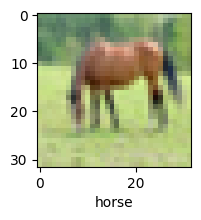

In [65]:
plot_sample(X_test, y_test,60)

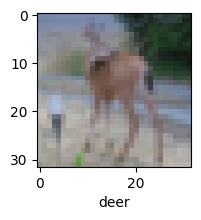

In [62]:
plot_sample(X_test, y_test, 100)

In [66]:
classes[y_classes[60]]

'horse'